In [ ]:
#!pip install pandas

In [46]:

import pandas as pd
import matplotlib.pyplot as plt


# Load the CSV file
data = pd.read_csv("output.csv")


# Define groups
groups = [
    'NO_TLM','TLM',
    'TLM_STOPPED BEFORE_STOP', 'TLM_STOPPED WHILE_STOP', 'TLM_STOPPED AFTER_STOP',
    'NO_TLM LONG_30m', 'TLM LONG_30m'
]
print(data.shape)
data.head()

(123, 39)


,Name,concurrentUsers,numberRequests,delayBetweeenRequests,ProblemSizePropA,ProblemSizePropB,ResultCount,ResultMin,ResultMax,ResultMean,...,used_heap_size_after,heap_size_limit_after,malloced_memory_after,peak_malloced_memory_after,does_zap_garbage_after,number_of_native_contexts_after,number_of_detached_contexts_after,total_global_handles_size_after,used_global_handles_size_after,external_memory_after
0,NO_TLM ONES 1,1,200,100,13,13,200,0.916,10.984,6.349,...,20.973,4144,0.516,5.062,0,0,0,0.008,0.004,2.380
1,NO_TLM ONES 2,1,200,100,13,13,200,1.290,9.721,6.391,...,21.850,4144,0.516,5.623,0,0,0,0.008,0.004,2.388
2,NO_TLM ONES 3,1,200,100,13,13,200,1.236,9.652,6.304,...,22.057,4144,0.516,5.559,0,0,0,0.008,0.004,2.388
3,NO_TLM ONES 4,1,200,100,13,13,200,1.516,9.056,6.473,...,21.671,4144,0.516,5.652,0,0,0,0.008,0.004,2.388
4,NO_TLM ONES 5,1,200,100,13,13,200,1.232,10.886,6.063,...,21.380,4144,0.516,5.423,0,0,0,0.008,0.004,2.380


In [47]:
# Delete the last two characters of the first column (Name), making a copy of the table
no_index_data = data.copy()
no_index_data['Name'] = data['Name'].str[:-2]


# Aggregate data, grouping by the first column (Name) and calulating the mean of the rest of the columns
grouped_data = no_index_data.groupby('Name').mean().reset_index()
print(grouped_data['Name'].values)

['NO_TLM HUNDREDS' 'NO_TLM LONG_30m HUNDREDS' 'NO_TLM LONG_30m ONES'
 'NO_TLM LONG_30m TENS' 'NO_TLM ONES' 'NO_TLM TENS' 'TLM HUNDREDS'
 'TLM LONG_30m HUNDREDS' 'TLM LONG_30m ONES' 'TLM LONG_30m TENS'
 'TLM ONES' 'TLM TENS' 'TLM_STOPPED AFTER_STOP HUNDREDS'
 'TLM_STOPPED AFTER_STOP ONES' 'TLM_STOPPED AFTER_STOP TENS'
 'TLM_STOPPED BEFORE_STOP HUNDREDS' 'TLM_STOPPED BEFORE_STOP ONES'
 'TLM_STOPPED BEFORE_STOP TENS' 'TLM_STOPPED WHILE_STOP HUNDREDS'
 'TLM_STOPPED WHILE_STOP ONES' 'TLM_STOPPED WHILE_STOP TENS']


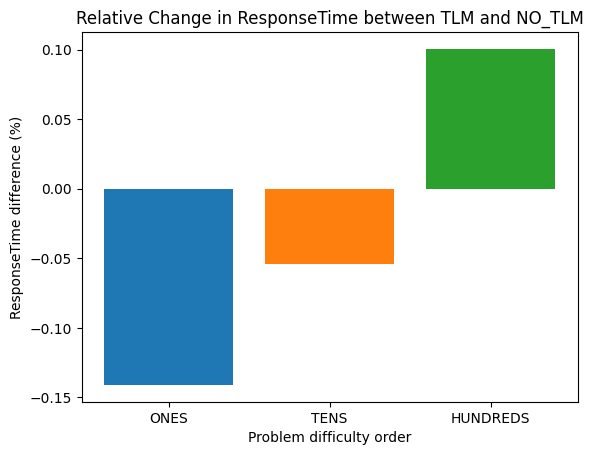

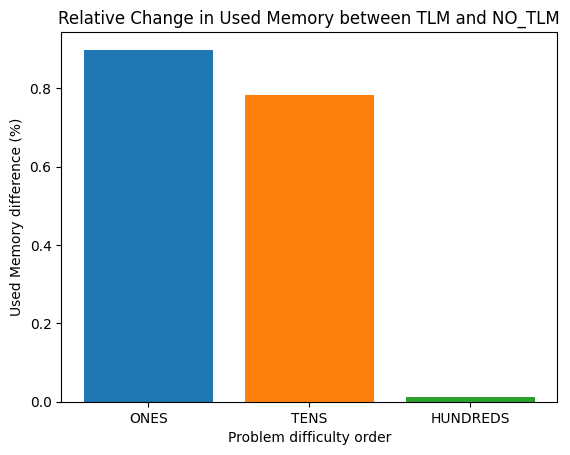

In [48]:
# TEST TYPE 1 = (TLM vs NO_TLM)
#Relative change 
columns = ["ResultMean","used_heap_size_after"]
columns_names = ["ResponseTime","Used Memory"]

for i in range(len(columns)):
    column = columns[i]
    column_name = columns_names[i]
    #create figure
    fig, ax = plt.subplots()
    column
    ax.set_title("Relative Change in " + column_name + " between TLM and NO_TLM")

    ax.set_ylabel(column_name+" difference (%)")

    ax.set_xlabel("Problem difficulty order")
    for bar in ["ONES","TENS","HUNDREDS"]:
        TLM_search = "TLM " + bar
        NO_TLM_search = "NO_TLM " + bar 

        TLM_mean = grouped_data.loc[grouped_data['Name'] == TLM_search, column].values[0]
        NO_TLM_mean = grouped_data.loc[grouped_data['Name'] == NO_TLM_search, column].values[0]
        relative_change = (TLM_mean - NO_TLM_mean) / NO_TLM_mean
        ax.bar(bar, relative_change)
    #save as png in /plots
    plt.savefig("./plots/Test1_"+column+"_relative_change.png")

    



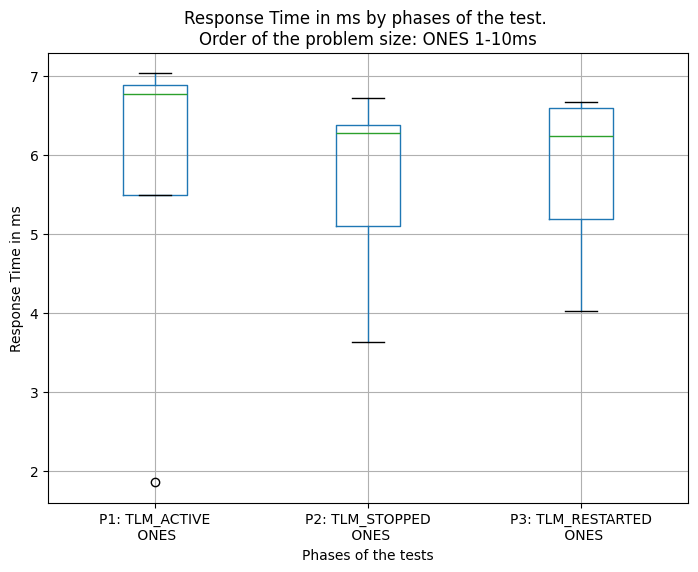

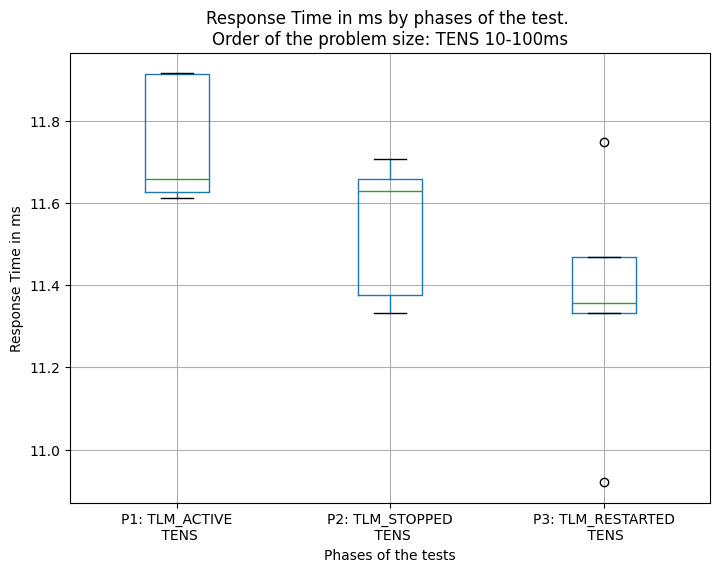

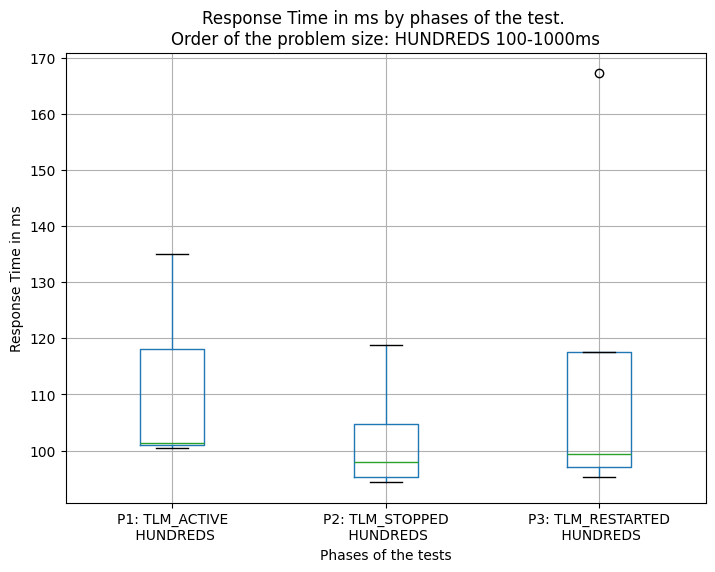

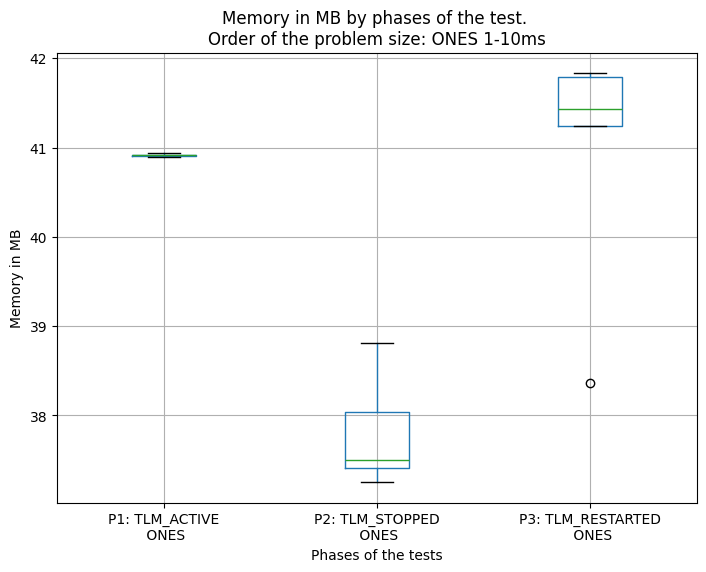

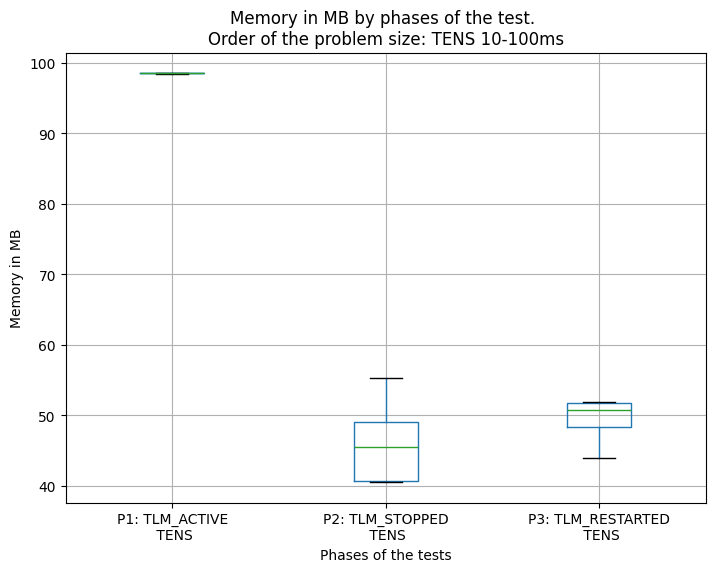

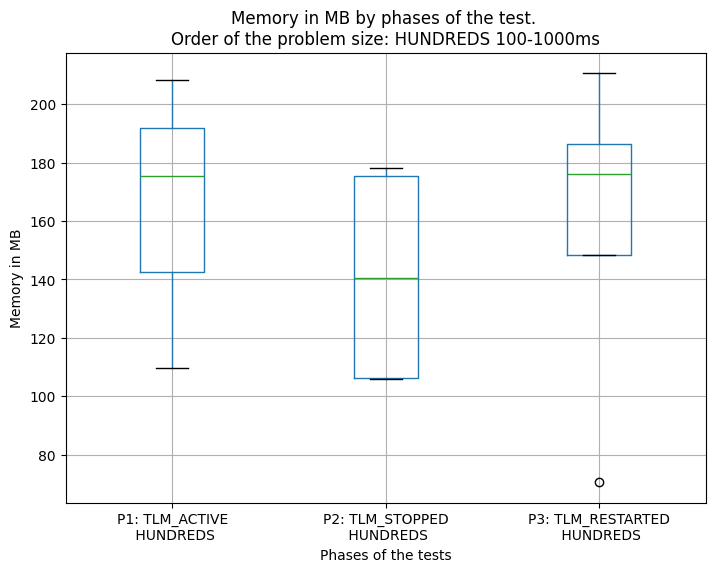

In [49]:

# TEST TYPE 2 = TLM_STOPPED : BEFORE_STOP vs WHILE_STOP vs AFTER_STOP 

# Define replacements
replacements = {
    'TLM_STOPPED BEFORE_STOP': 'P1: TLM_ACTIVE\n',
    'TLM_STOPPED WHILE_STOP': 'P2: TLM_STOPPED\n',
    'TLM_STOPPED AFTER_STOP': 'P3: TLM_RESTARTED\n'
}

# Function to apply replacements to a string
def replace_names(full_name):
    for old, new in replacements.items():
        full_name = full_name.replace(old, new)
    return full_name

def print_boxplot(data, column,column_name, order):
    data.boxplot(column=column, by='Name', figsize=(8, 6))
    plt.title(column_name+" by phases of the test. \nOrder of the problem size: "+order)
    plt.suptitle('')
    plt.ylabel(column_name)
    plt.xlabel("Phases of the tests")
    plt.savefig("./plots/Test2_"+column+"_"+order+".png")


test2_data = no_index_data.copy()
#Only keep the TLM_STOPPED in Name column, and 13 in problemSizePropA lines
test2_data = test2_data[test2_data['Name'].str.contains('TLM_STOPPED') ]
test2_data['Name'] = test2_data['Name'].apply(replace_names)



test2_data_ONES = test2_data[test2_data['ProblemSizePropA'] == 13]
print_boxplot(test2_data_ONES, "ResultMean","Response Time in ms","ONES 1-10ms")

test2_data_TENS = test2_data[test2_data['ProblemSizePropA'] == 6000]
print_boxplot(test2_data_TENS, "ResultMean","Response Time in ms","TENS 10-100ms")

test2_data_HUNDREDS = test2_data[test2_data['ProblemSizePropA'] == 88000]
print_boxplot(test2_data_HUNDREDS, "ResultMean","Response Time in ms","HUNDREDS 100-1000ms")

# Now comare the memory not the ResultMean
print_boxplot(test2_data_ONES, "used_heap_size_after","Memory in MB","ONES 1-10ms")
print_boxplot(test2_data_TENS, "used_heap_size_after","Memory in MB","TENS 10-100ms")
print_boxplot(test2_data_HUNDREDS, "used_heap_size_after","Memory in MB","HUNDREDS 100-1000ms")




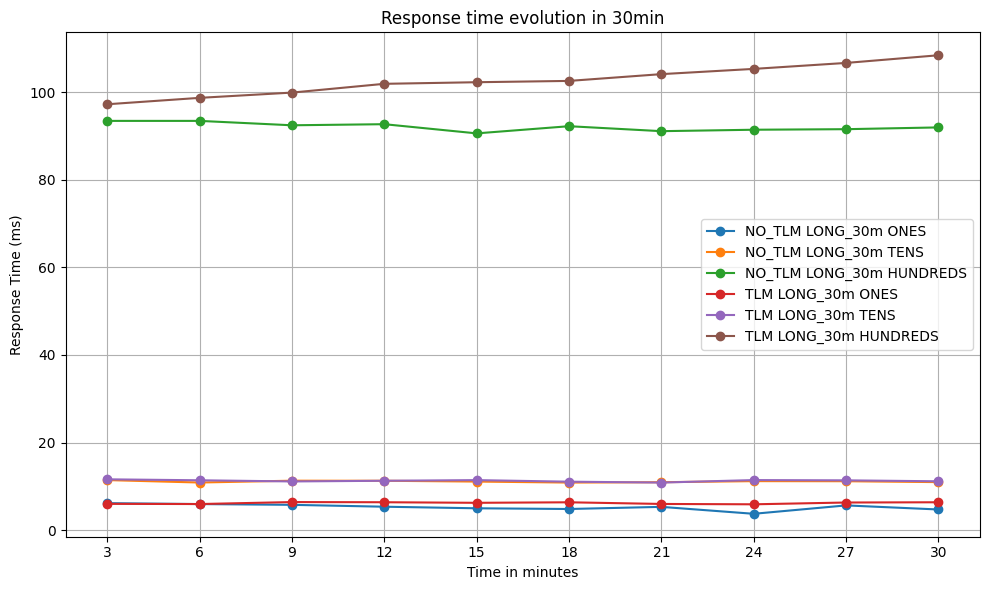

In [50]:
# TEST TYPE 3 = TLM vs NO_TLM LONG_30m
# Define the categories
categories = ["ONES", "TENS", "HUNDREDS"]

# Create a figure
plt.figure(figsize=(10, 6))

# Iterate over each group name
for group_name in ["NO_TLM LONG_30m", "TLM LONG_30m"]:
    # Initialize an empty list to store x and y values for each category
    for category in categories:
        # Filter data for the current category and group
        category_data = no_index_data[no_index_data['Name']==(f"{group_name} {category}")]
        
        # Extract column 9 values
        y_values = category_data.iloc[:, 9]

        # Create x values (assuming each row represents 3 minutes of time)
        x_values = range(3, len(y_values)*3+3, 3)
        
        # Plot the line for the current category and group
        plt.plot(x_values, y_values, marker='o', linestyle='-', label=f"{group_name} {category}")
        plt.xticks(x_values)

# Add labels and title
plt.xlabel('Time in minutes')
plt.ylabel('Response Time (ms)')
plt.title('Response time evolution in 30min')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("./plots/Test3_ResponseTime.png")
plt.show()
